In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as LR

x = np.random.uniform(0.1,5,100)
noise = np.random.normal(scale=1, size=x.size)
y = (4-x)*(2-x)*(1-x) + noise
df = pd.DataFrame({"y":y, "x":x})
df.head()

,y,x
0,-4.211312,4.704318
1,-0.434695,2.175788
2,3.761103,0.380135
3,-0.698163,1.255819
4,5.630255,0.346964


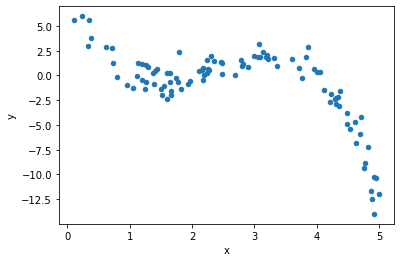

In [2]:
ax = df.plot.scatter(x="x", y="y")

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(4, include_bias=False)
columns = ["x"]
arr = poly.fit_transform(df[columns])
poly_df = pd.DataFrame(arr, columns=poly.get_feature_names(columns))
poly_df

,x,x^2,x^3,x^4
0,4.704318,22.130607,104.109413,489.763779
1,2.175788,4.734055,10.300302,22.411276
2,0.380135,0.144502,0.054930,0.020881
3,1.255819,1.577082,1.980530,2.487188
4,0.346964,0.120384,0.041769,0.014492
...,...,...,...,...
95,1.508459,2.275449,3.432421,5.177666
96,0.620923,0.385545,0.239394,0.148645
97,0.709367,0.503202,0.356955,0.253212
98,2.154429,4.641565,9.999923,21.544127


In [5]:
lr = LR()
lr.fit(poly_df, df[["y"]])
lr.coef_, lr.intercept_

(array([[-11.79697735,   4.92147575,  -0.34851077,  -0.06547438]]),
 array([7.63529228]))

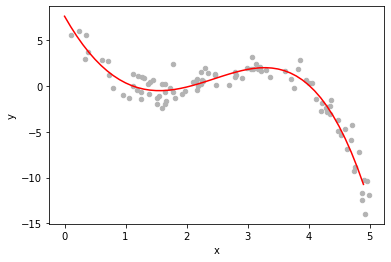

In [6]:
ax = df.plot.scatter(x="x", y="y", color="0.7")

# compute coords along fit line, then plot it
fit_x = np.arange(0, 5, 0.1).reshape(-1,1)
fit_y = lr.predict(poly.fit_transform(fit_x))
ax.plot(fit_x, fit_y, "red")

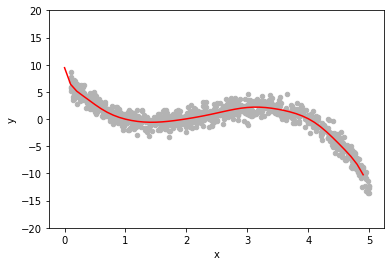

In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import PolynomialFeatures

# random data
x = np.random.uniform(0.1, 5, 1000)# TODO: specify sample size
noise = np.random.normal(scale=1, size=x.size)
y = (4-x)*(2-x)*(1-x) + noise
df = pd.DataFrame({"y":y, "x":x})

# add columns for polynomial terms
poly = PolynomialFeatures(15, include_bias=False)
columns = ["x"]
arr = poly.fit_transform(df[columns])
poly_df = pd.DataFrame(arr, columns=poly.get_feature_names(columns))

# linear regression
lr = LR()
lr.fit(poly_df, df[["y"]])
ax = df.plot.scatter(x="x", y="y", color="0.7", ylim=(-20, 20))

# compute coords along fit line, then plot it
fit_x = np.arange(0, 5, 0.1).reshape(-1,1)
fit_y = lr.predict(poly.fit_transform(fit_x))
ax.plot(fit_x, fit_y, "red")
